# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Business Objective
 Background: The used car business in America is a surprisingly complex ecosystem. Several interconnected factors contribute to this complexity, making it a challenging industry to navigate for both buyers and sellers for e.g. Variety of products, information asymetry between buyer and seller, fluctuating market dynamics etc.
 Here, we are trying to create an AI model to simplify the process of identifying which factors influence the used car prices more to help dealers take necessary action to maxizmize their sale. 

#### Business Success Criteria
Perform predictive analysis to provide recmmendaton to used car dealers on various ways they can maximize their sales. 

Recources: Enough historic data, data with features influencing car prices

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

-  Identify and ignore nulls, 
-  normalize outliers, convert categorical features to numeric, 
-  Observe the dataset for interesting details and/or trends(are their estimates), 
-  scale the data to normalize magnitude of different features

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from warnings import filterwarnings 
filterwarnings('ignore')




In [10]:
pip install --upgrade category_encoders

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [68]:
import category_encoders as ce
import xgboost as xgb

In [12]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import plotly.express as px
from scipy.linalg import svd

In [14]:
raw_url = 'https://github.com/nisheethg2000/UCB_AIML/raw/refs/heads/main/Practical%20Application/data/vehicles.zip'
car_data = pd.read_csv(raw_url, compression = 'zip')

In [15]:
car_data.head(20)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [16]:
car_data.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [17]:
print(car_data.dtypes)

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


In [18]:
#Checking to see how many rows have null in most of the columns except id, price, state and region
car_data[car_data.isna().sum(axis=1) >= 14].count()


id              68
region          68
price           68
year             0
manufacturer     0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
title_status     0
transmission     0
VIN              0
drive            0
size             0
type             0
paint_color      0
state           68
dtype: int64

In [19]:
#counting number of rows with price=0
car_data[car_data['price'] == 0 ].count()

id              32895
region          32895
price           32895
year            32863
manufacturer    31434
model           32319
condition       10180
cylinders       15627
fuel            32476
odometer        30785
title_status    32387
transmission    32162
VIN             24011
drive           22582
size             9467
type            25969
paint_color     19841
state           32895
dtype: int64

In [20]:
## dropping rows with null values in most of the features.
car_data = car_data[car_data.isna().sum(axis=1) < 14]

In [21]:
## checling to see what percent of values are null in each feature
for car in car_data.columns:
    print(f"{car}:unique:{((car_data[car].nunique()/car_data[car].size)*100)}%  NotNull:{((car_data[car].count()/car_data[car].size)*100)}%  Null:{((car_data[car].isna().sum()/car_data[car].size)*100)}%:{car_data[car].dtype}")
print("total columns:",car_data.columns.shape)

id:unique:100.0%  NotNull:100.0%  Null:0.0%:int64
region:unique:0.09465525805272579%  NotNull:100.0%  Null:0.0%:object
price:unique:3.667188363963525%  NotNull:100.0%  Null:0.0%:int64
year:unique:0.026709652024779058%  NotNull:99.73360636533181%  Null:0.26639363466819116%:float64
manufacturer:unique:0.009840398114392284%  NotNull:95.88155909393363%  Null:4.118440906066371%:object
model:unique:6.946618183181354%  NotNull:98.77955633862216%  Null:1.220443661377843%:object
condition:unique:0.0014057711591988979%  NotNull:59.22420175627677%  Null:40.77579824372323%:object
cylinders:unique:0.0018743615455985305%  NotNull:58.38683073578063%  Null:41.61316926421937%:object
fuel:unique:0.0011714759659990817%  NotNull:99.31000065602655%  Null:0.689999343973459%:object
odometer:unique:24.57053691086474%  NotNull:98.9850332230584%  Null:1.0149667769416042%:float64
title_status:unique:0.0014057711591988979%  NotNull:98.0848710907847%  Null:1.9151289092152985%:object
transmission:unique:0.000702885

### Dropping unnecessary columns

- `ID` is a unique identifier for each customer but not continuous so cannot be used to set as an index and also not useful for PCA.
- `VIN`  is not useful for PCA.
- `condition`,`drive`,`paint_color` are not useful as it is not populated for more then 25% of the data.
- `cylinders` is not useful as it is not populated for about 40% of the data.
- `Region` is not as useful since we have `state`.
- `size` is not useful as it is not populated for about 72% of the data.

In [22]:
dropped_features = ['id','VIN','condition','cylinders','size','drive','paint_color','region']

In [23]:
car_data_clean = car_data.drop(dropped_features, axis=1)

In [24]:
car_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426812 entries, 27 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426812 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   fuel          423867 non-null  object 
 5   odometer      422480 non-null  float64
 6   title_status  418638 non-null  object 
 7   transmission  424324 non-null  object 
 8   type          334022 non-null  object 
 9   state         426812 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 35.8+ MB


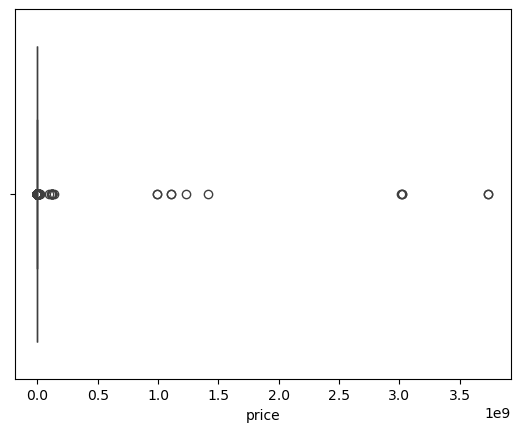

In [25]:
##checking for outliers
sns.boxplot(data=car_data_clean, x="price")
plt.show()

### Removing outliers

In [26]:
def remove_outliers_iqr(df, column):
    """
    Identifies and removes outliers from a Pandas DataFrame column using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The name of the column to check for outliers.

    Returns:
        pd.DataFrame: A new DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print("lower_bound",lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    print("upper_bound",upper_bound)
    
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

In [27]:
car_data_clean = remove_outliers_iqr(car_data_clean, 'price')

lower_bound -24983.5
upper_bound 57372.5


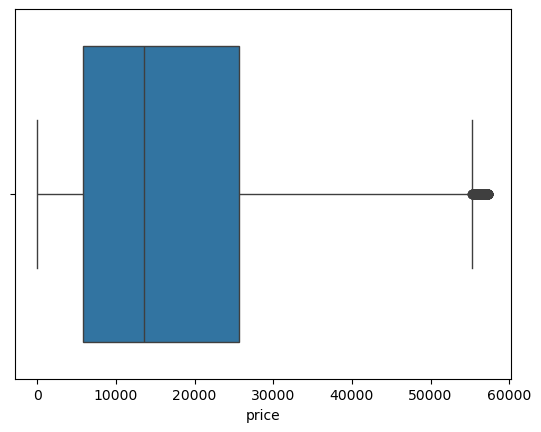

In [28]:
##checking for outliers
sns.boxplot(data=car_data_clean, x="price")
plt.show()

In [29]:
car_data_clean['price'].describe()

count    418635.000000
mean      16343.683335
std       13148.827919
min           0.000000
25%        5800.000000
50%       13495.000000
75%       25590.000000
max       57341.000000
Name: price, dtype: float64

### Encoding and scaling the data to run PCA and determine correlation

In [31]:
car_data_encode = car_data_clean.drop('price',axis=1)

In [32]:
#for cat in categorical_columns:
m_estimator = ce.MEstimateEncoder(cols=car_data_encode.columns)
car_data_encoded = m_estimator.fit_transform(car_data_encode, car_data_clean['price'])
#X_test_encoded = m_estimator.transform(X_test)

In [33]:
targ_enc = ce.TargetEncoder(cols=car_data_encode.columns)
car_data_encoded = targ_enc.fit_transform(car_data_encode, car_data_clean['price'])

In [34]:
car_data_encoded['price'] = car_data_clean['price']
print(car_data_encoded.shape)
print(type(car_data_encoded))
print(car_data_encoded.columns)

(418635, 10)
<class 'pandas.core.frame.DataFrame'>
Index(['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status',
       'transmission', 'type', 'state', 'price'],
      dtype='object')


#### Examining the Correlations

In [35]:
#feature & target
target = car_data_clean['price']
#features = car_data.drop('price',axis=1)
#scale data
scaler=StandardScaler()
car_data_encoded[car_data_encoded.columns]=scaler.fit_transform(car_data_encoded[car_data_encoded.columns])

In [36]:
highest_corr = car_data_encoded.corr()[['price']].nlargest(columns = 'price', n = 2).index[1]

print("highest correlation:",highest_corr)

highest correlation: odometer


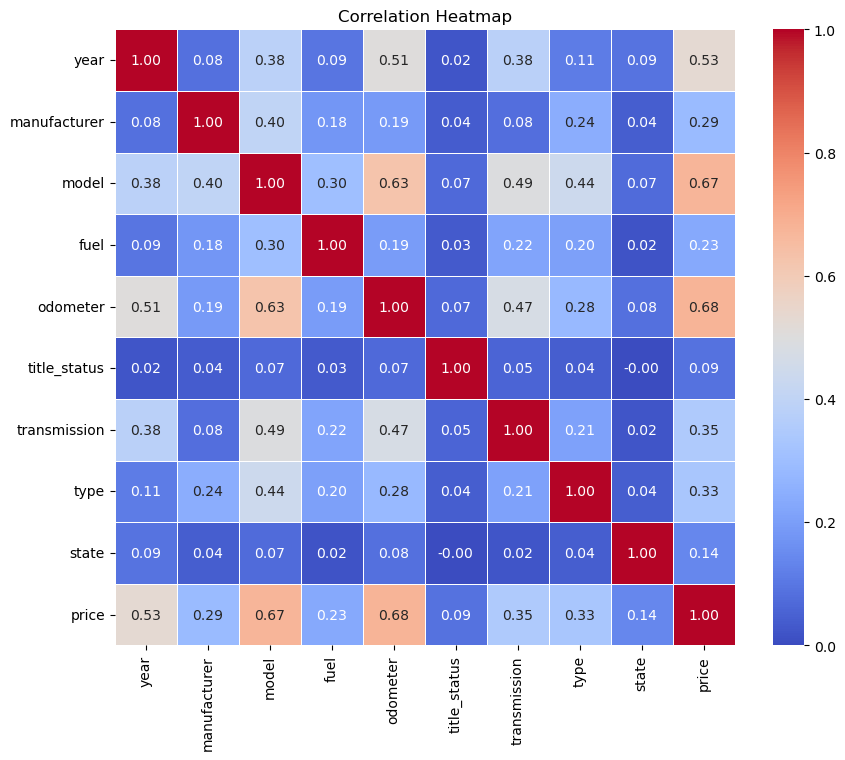

In [37]:
corr_matrix = car_data_encoded.corr()
plt.figure(figsize=(10, 8)) # Adjust size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [38]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(car_data_encoded)

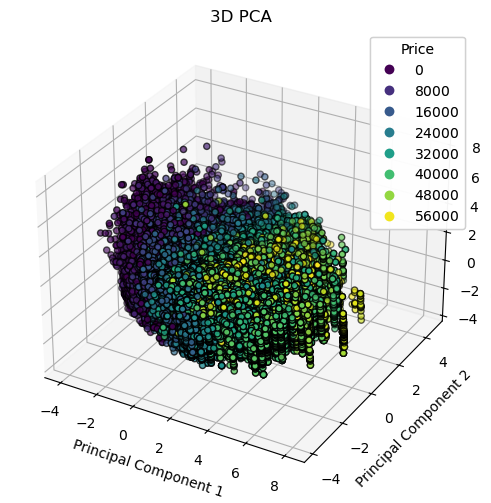

In [39]:
#plot in 3D with Matplotlib
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=target, cmap='viridis', edgecolor='k')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA')
legend1 = ax.legend(*scatter.legend_elements(), title='Price')
ax.add_artist(legend1)
plt.show()

In [40]:
#pca to 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(car_data_encoded)

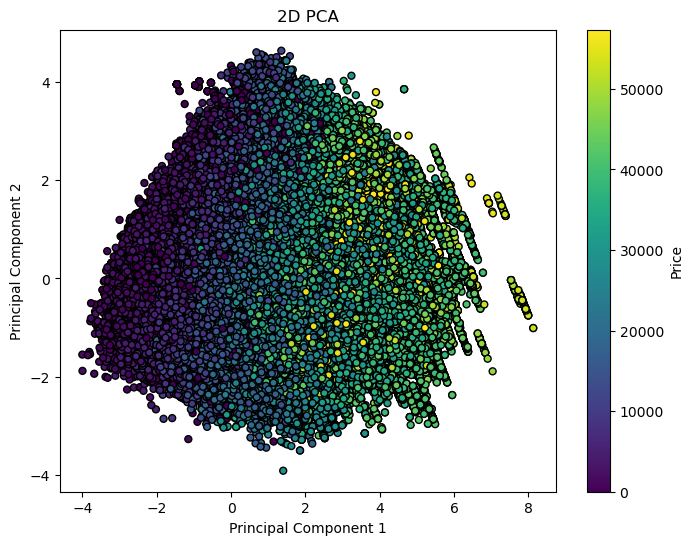

In [41]:
#plot in 2D with Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=target, cmap='viridis', edgecolor='k', s=25)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.colorbar(label='Price')
plt.show()

In [42]:
#px.scatter(data_frame=car_data, x='price', y='year')
variance = car_data_encoded.var()
#high_variance_features = variance[variance > 10] 
print(variance)
#X_train_encoded.boxplot(column=high_variance_features.index) 
#plt.boxplot(variance)

year            1.000002
manufacturer    1.000002
model           1.000002
fuel            1.000002
odometer        1.000002
title_status    1.000002
transmission    1.000002
type            1.000002
state           1.000002
price           1.000002
dtype: float64


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

- `M-Estimate Encoder`, `CatBoost Encoder` , `James-stein Encoder` will be used to encoding categorical columns into numerical. 
- Then will use LinearRegression and Ridge to perform predictions.


In [90]:
target_feature = 'price'
car_data_clean = car_data_clean.fillna('missing')
X = car_data_clean.drop('price', axis=1)
y = car_data_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(X_train.shape)
print(y_train.shape)

(334908, 9)
(334908,)


In [46]:

#for cat in categorical_columns:
ml_estimator = ce.MEstimateEncoder(cols=X_train.columns)
mestimator_linear_pipeline = Pipeline([
    ('mtransformer', ml_estimator), 
    ('mscalor',StandardScaler()),
    ('mlinreg', LinearRegression())])
mestimator_linear_pipeline

Pipeline(steps=[('mtransformer',
                 MEstimateEncoder(cols=Index(['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object'))),
                ('mscalor', StandardScaler()),
                ('mlinreg', LinearRegression())])

In [47]:

#for cat in categorical_columns:
mr_estimator = ce.MEstimateEncoder(cols=X_train.columns)
mestimator_ridge_pipeline = Pipeline([
    ('mrtransformer', mr_estimator), 
    ('mrscalor',StandardScaler()),
    ('mridge', Ridge(alpha=1000))])
mestimator_ridge_pipeline

Pipeline(steps=[('mrtransformer',
                 MEstimateEncoder(cols=Index(['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object'))),
                ('mrscalor', StandardScaler()), ('mridge', Ridge(alpha=1000))])

In [48]:

#for cat in categorical_columns:
js_estimator = ce.JamesSteinEncoder(cols=X_train.columns)
js_linear_pipeline = Pipeline([
    ('jtransformer', js_estimator), 
    ('jscalor',StandardScaler()),
    ('jlinreg', LinearRegression())])
js_linear_pipeline

Pipeline(steps=[('jtransformer',
                 JamesSteinEncoder(cols=Index(['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object'))),
                ('jscalor', StandardScaler()),
                ('jlinreg', LinearRegression())])

In [49]:

#for cat in categorical_columns:
jsr_estimator = ce.JamesSteinEncoder(cols=X_train.columns)
js_ridge_pipeline = Pipeline([
    ('jrtransformer', jsr_estimator), 
    ('jrscalor',StandardScaler()),
    ('jridge', Ridge())])
js_ridge_pipeline

Pipeline(steps=[('jrtransformer',
                 JamesSteinEncoder(cols=Index(['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object'))),
                ('jrscalor', StandardScaler()), ('jridge', Ridge())])

In [50]:

#for cat in categorical_columns:
c_estimator = ce.CatBoostEncoder(cols=X_train.columns)
c_linear_pipeline = Pipeline([
    ('ctransformer', c_estimator), 
    ('cscalor',StandardScaler()),
    ('clinreg', LinearRegression())])
c_linear_pipeline

Pipeline(steps=[('ctransformer',
                 CatBoostEncoder(cols=Index(['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object'))),
                ('cscalor', StandardScaler()),
                ('clinreg', LinearRegression())])

In [51]:

#for cat in categorical_columns:
cr_estimator = ce.CatBoostEncoder(cols=X_train.columns)
cr_ridge_pipeline = Pipeline([
    ('crtransformer', cr_estimator), 
    ('crscalor',StandardScaler()),
    ('cridge', Ridge(alpha=1000))])
cr_ridge_pipeline

Pipeline(steps=[('crtransformer',
                 CatBoostEncoder(cols=Index(['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status',
       'transmission', 'type', 'state'],
      dtype='object'))),
                ('crscalor', StandardScaler()), ('cridge', Ridge(alpha=1000))])

In [52]:
model_results = pd.DataFrame(columns=['loss','MEstimator_Linear','MEstimator_Ridge','JStein_Linear','JStein_Ridge','CBoost_Linear','CBoost_Ridge'])
model_results['loss']=['MSE_Train','MSE_Test','MAE_Train','MAE_Test','R2_Train','R2_Test']
model_results = model_results.set_index('loss')
model_results.head(6)

,MEstimator_Linear,MEstimator_Ridge,JStein_Linear,JStein_Ridge,CBoost_Linear,CBoost_Ridge
loss,,,,,,
MSE_Train,NaN,NaN,NaN,NaN,NaN,NaN
MSE_Test,NaN,NaN,NaN,NaN,NaN,NaN
MAE_Train,NaN,NaN,NaN,NaN,NaN,NaN
MAE_Test,NaN,NaN,NaN,NaN,NaN,NaN
R2_Train,NaN,NaN,NaN,NaN,NaN,NaN
R2_Test,NaN,NaN,NaN,NaN,NaN,NaN


Model with MEstimator Encoder, Standard SCaler and Liner Regression

In [83]:
mestimator_linear_pipeline.fit(X_train,y_train)
y_train_pred = mestimator_linear_pipeline.predict(X_train)
y_test_pred = mestimator_linear_pipeline.predict(X_test)
train_mse = float(mean_squared_error(y_train,y_train_pred))
test_mse = float(mean_squared_error(y_test,y_test_pred))
train_mae = float(mean_absolute_error(y_train,y_train_pred))
test_mae = float(mean_absolute_error(y_test,y_test_pred))

# Compute R² using Scikit-Learn
R2_test = r2_score(y_test, y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
model_results['MEstimator_Linear']=[train_mse,test_mse,train_mae,test_mae,R2_train,R2_test]

Model with MEstimator Encoder, Standard SCaler and Ridge Regression

In [84]:
mestimator_ridge_pipeline.fit(X_train,y_train)
y_train_pred = mestimator_ridge_pipeline.predict(X_train)
y_test_pred = mestimator_ridge_pipeline.predict(X_test)
train_mse = float(mean_squared_error(y_train,y_train_pred))
test_mse = float(mean_squared_error(y_test,y_test_pred))
train_mae = float(mean_absolute_error(y_train,y_train_pred))
test_mae = float(mean_absolute_error(y_test,y_test_pred))

# Compute R² using Scikit-Learn
R2_test = r2_score(y_test, y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
model_results['MEstimator_Ridge']=[train_mse,test_mse,train_mae,test_mae,R2_train,R2_test]

Model with JamesStein Encoder, Standard SCaler and Liner Regression

In [85]:
js_linear_pipeline.fit(X_train,y_train)
y_train_pred = js_linear_pipeline.predict(X_train)
y_test_pred = js_linear_pipeline.predict(X_test)
train_mse = float(mean_squared_error(y_train,y_train_pred))
test_mse = float(mean_squared_error(y_test,y_test_pred))
train_mae = float(mean_absolute_error(y_train,y_train_pred))
test_mae = float(mean_absolute_error(y_test,y_test_pred))

# Compute R² using Scikit-Learn
R2_test = r2_score(y_test, y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
model_results['JStein_Linear']=[train_mse,test_mse,train_mae,test_mae,R2_train,R2_test]

Model with JamesStein Encoder, Standard SCaler and Ridge Regression

In [86]:
js_ridge_pipeline.fit(X_train,y_train)
y_train_pred = js_ridge_pipeline.predict(X_train)
y_test_pred = js_ridge_pipeline.predict(X_test)
train_mse = float(mean_squared_error(y_train,y_train_pred))
test_mse = float(mean_squared_error(y_test,y_test_pred))
train_mae = float(mean_absolute_error(y_train,y_train_pred))
test_mae = float(mean_absolute_error(y_test,y_test_pred))

# Compute R² using Scikit-Learn
R2_test = r2_score(y_test, y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
model_results['JStein_Ridge']=[train_mse,test_mse,train_mae,test_mae,R2_train,R2_test]

Model with Cboost Encoder, Standard SCaler and Liner Regression

In [87]:
c_linear_pipeline.fit(X_train,y_train)
y_train_pred = c_linear_pipeline.predict(X_train)
y_test_pred = c_linear_pipeline.predict(X_test)
train_mse = float(mean_squared_error(y_train,y_train_pred))
test_mse = float(mean_squared_error(y_test,y_test_pred))
train_mae = float(mean_absolute_error(y_train,y_train_pred))
test_mae = float(mean_absolute_error(y_test,y_test_pred))

# Compute R² using Scikit-Learn
R2_test = r2_score(y_test, y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
model_results['CBoost_Linear']=[train_mse,test_mse,train_mae,test_mae,R2_train,R2_test]

Model with Cboost Encoder, Standard SCaler and Ridge Regression

In [88]:
cr_ridge_pipeline.fit(X_train,y_train)
y_train_pred = cr_ridge_pipeline.predict(X_train)
y_test_pred = cr_ridge_pipeline.predict(X_test)
train_mse = float(mean_squared_error(y_train,y_train_pred))
test_mse = float(mean_squared_error(y_test,y_test_pred))
train_mae = float(mean_absolute_error(y_train,y_train_pred))
test_mae = float(mean_absolute_error(y_test,y_test_pred))

# Compute R² using Scikit-Learn
R2_test = r2_score(y_test, y_test_pred)
R2_train = r2_score(y_train, y_train_pred)
model_results['CBoost_Ridge']=[train_mse,test_mse,train_mae,test_mae,R2_train,R2_test]

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [89]:
model_results.head(6)

,MEstimator_Linear,MEstimator_Ridge,JStein_Linear,JStein_Ridge,CBoost_Linear,CBoost_Ridge
loss,,,,,,
MSE_Train,0.221215,0.221223,0.212228,0.212228,0.303510,0.303490
MSE_Test,0.367943,0.367254,0.395113,0.395112,0.365123,0.365059
MAE_Train,0.313575,0.313558,0.300922,0.300922,0.380692,0.380527
MAE_Test,0.410831,0.410367,0.422618,0.422618,0.415586,0.415439
R2_Train,0.778569,0.778560,0.787564,0.787564,0.696192,0.696212
R2_Test,0.632786,0.633474,0.605670,0.605670,0.635600,0.635665


In [60]:
# Calculate the permutation importance

results = permutation_importance(mestimator_ridge_pipeline, X_test, y_test,n_repeats=10)
#importances = pd.DataFrame(data=results.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)


In [61]:
df = pd.DataFrame(results['importances'])
df = df.T
df.columns = X_test.columns
px.box(data_frame=df, orientation='h', title = 'Feature importance for price prediction')

In [ ]:

mr_estimator = ce.MEstimateEncoder(cols=X_train.columns)
X_train_encoded =  mr_estimator.fit_transform(X_train,y_train)


In [63]:
def get_parameters_for_given_alpha(alpha):
    lm_with_ridge_model = Ridge(alpha = alpha)
    lm_with_ridge_model.fit(X_train_encoded,y_train)
    training_mse = mean_squared_error(lm_with_ridge_model.predict(X_train_encoded),y_train)
    return alpha, *lm_with_ridge_model.coef_, training_mse
    

In [64]:
param_df = pd.DataFrame([get_parameters_for_given_alpha(alpha) for alpha in [0.01, 0.1, 1, 10, 100, 1000, 10000,100000]],
                        columns = ["alpha", *X_train_encoded.columns,"Training MSE"])
param_df

,alpha,year,manufacturer,model,fuel,odometer,title_status,transmission,type,state,Training MSE
0,0.01,0.193643,0.067193,0.413818,0.077105,0.853083,0.290113,-0.287254,0.060189,0.208170,0.225052
1,0.10,0.193643,0.067193,0.413818,0.077105,0.853083,0.290101,-0.287252,0.060189,0.208167,0.225052
2,1.00,0.193643,0.067195,0.413818,0.077102,0.853077,0.289987,-0.287239,0.060190,0.208140,0.225052
3,10.00,0.193644,0.067215,0.413817,0.077071,0.853019,0.288846,-0.287105,0.060201,0.207871,0.225052
4,100.00,0.193652,0.067409,0.413803,0.076760,0.852438,0.277921,-0.285774,0.060307,0.205224,0.225053
5,1000.00,0.193895,0.069063,0.413552,0.073782,0.846515,0.201848,-0.273132,0.061286,0.182452,0.225147
6,10000.00,0.198261,0.075084,0.410070,0.056605,0.790566,0.055791,-0.181816,0.067498,0.093253,0.227831
7,100000.00,0.191310,0.062160,0.358897,0.038215,0.531489,0.009606,0.017664,0.070960,0.024999,0.282979


In [65]:
fig = px.line(param_df, x = "alpha", y = "Training MSE", log_x = True, markers = True)
#fig.write_image("MSE_vs_alpha_most_basic.png", scale = 3)
fig.show()

In [66]:
parameters = {'fit_intercept': [False, True]}

lr_model_finder = GridSearchCV(LinearRegression(),
                               parameters,
                               scoring = "neg_mean_squared_error",
                               cv=3)

lr_model_finder.fit(X_train_encoded, y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [False, True]},
             scoring='neg_mean_squared_error')

In [67]:
lr_model_finder.cv_results_

{'mean_fit_time': array([0.06369281, 0.07104294]),
 'std_fit_time': array([0.0013199 , 0.00107347]),
 'mean_score_time': array([0.00800721, 0.00783602]),
 'std_score_time': array([3.40715267e-06, 6.28270741e-04]),
 'param_fit_intercept': masked_array(data=[False, True],
              mask=[False, False],
        fill_value=True),
 'params': [{'fit_intercept': False}, {'fit_intercept': True}],
 'split0_test_score': array([-0.22442187, -0.22435218]),
 'split1_test_score': array([-0.22548871, -0.22539931]),
 'split2_test_score': array([-0.22556897, -0.22546916]),
 'mean_test_score': array([-0.22515985, -0.22507355]),
 'std_test_score': array([0.00052286, 0.00051089]),
 'rank_test_score': array([2, 1])}

All the different models and encoders combinations giving pretty consistent results which a R2 Score of ranging from 61% to 65%

Out of all the features Odometer, Model and Year are the most significant and have the most correlation with the Price of the car as can be seen in the Most important feature box chart above.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Final Result

The box chart of the most important features shows a very significant relationship between Odometer, model, year and Price of car sales. Customers are ready to pay a good price for cars which are not driven too much and are relatively newer.